## Coding activity 3: The Bias-Variance Decomposition

In [11]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt

def r(x): return 0.5*x*np.cos(4*np.pi*x)
def make_y(x): return r(x) + 0.1*np.random.normal(size=len(x))



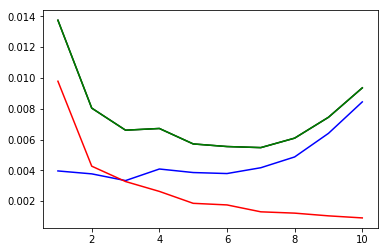

In [57]:
np.random.seed(668)
n = 50
k = 4

X = np.sort(np.random.uniform(size=n))
x = np.arange(0, 1, 0.001)
rx = r(x)
rX = r(X)

risks = []
squared_biases = []
variances = []

for k in range(1, 11):
    
    losses = []
    smoothers = []
    for j in range(50):
        
        R = KNeighborsRegressor(n_neighbors=k)
        R.fit(X.reshape(-1, 1), make_y(X))

        y_ = R.predict(x.reshape(-1, 1))
        
        smoothers.append(y_)
        
        loss = (rx - y_)**2
        losses.append(loss)
        
    squared_bias = np.mean((np.mean(smoothers, axis=0) - rx)**2)
    squared_biases.append(squared_bias)
    
    variance = np.mean(np.var(smoothers, axis=0))
    variances.append(variance)
    
    risk = np.mean(losses)
    risks.append(risk)

risks = np.array(risks)
plt.plot(range(1, 11), risks, 'k')
plt.plot(range(1, 11), squared_biases, 'b')
plt.plot(range(1, 11), variances, 'r')
plt.plot(range(1, 11), np.array(variances) + np.array(squared_biases), 'g')
plt.show()

In [58]:
from sklearn.model_selection import LeaveOneOut

In [63]:
np.random.seed(668)
n = 50
k = 4

X = np.sort(np.random.uniform(size=n))
y = make_y(X)

In [64]:
split_gen = loo.split(X)

In [84]:
scores = []
for k in range(1, 21):
    y_ = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        R = KNeighborsRegressor(n_neighbors=k)
        R.fit(X_train.reshape(-1, 1), y_train)
        y_.append(R.predict(X_test.reshape(-1, 1))[0])
    scores.append(np.dot(y_ - y, y_ - y))

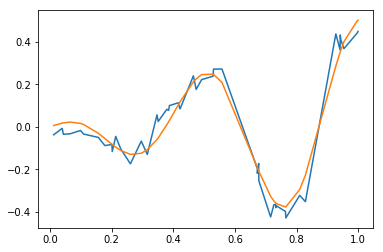

In [74]:
plt.plot(X, y_)
plt.plot(X, r(X))

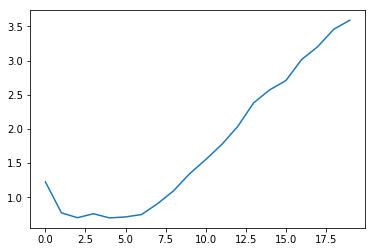

In [85]:
plt.plot(scores)

In [80]:
-np.mean(cross_val_score(R, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=50))

0.015216579631650032